# Test Dataset for the AMF_MS

In [1]:
# DATA HANDLING
import pandas as pd
import numpy as np
import ast
from copy import deepcopy

# BESPOKE
import packages.spectra_visualiser.spectra_visualiser as vis
import packages.carboxy.carboxy as cbx

# VISUALISATION
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  


In [2]:
def sum_MS(spec1, spec2, label:str="", spec1_ratio:float=1.0, spec2_ratio:float=1.0, rand:bool=False):
    df_shared = cbx.msrep.gen_table(spec1, spec2)

    ri_max = []
    
    if rand == True:
        spec1_ratio = np.random.uniform(0.0, 1.0)
        spec2_ratio = np.random.uniform(0.0, 1.0)
    
    #df_shared = add_noise(df_shared, 'Relative Intensity 1')
    #df_shared = add_noise(df_shared, 'Relative Intensity 2')
    
    for index, row in df_shared.iterrows():
        ri1 = row['Relative Intensity 1']*spec1_ratio
        ri2 = row['Relative Intensity 2']*spec2_ratio

        ri_max.append(max([ri1,ri2]))
    
    df_shared['Intensity'] = ri_max
    df_shared['Relative Intensity'] = ri_max
    
    df_shared = add_noise(df_shared)

    obj = vis.spec_classes.spec_obj(df_shared, 'ms', label)
    
    if rand == True:
        return obj, (spec1_ratio, spec2_ratio)
    else:
        return obj
    

def add_noise(df):
    # add noise to 'Relative Intensity'
    sigma = 15
    mu = 0.01

    new_ri = []

    for index, row in df.iterrows():
        if row['Relative Intensity'] > 5.0:
            noise = sigma * np.random.randn(1) + mu
            noisy_ri = row['Relative Intensity'] + noise
            new_ri.append(noisy_ri)
        else:
            new_ri.append(row['Relative Intensity'])

    new_ri = [0.0 if x < 0.0 else x for x in new_ri]
    new_ri = [100.0 if x > 100.0 else x for x in new_ri]

    df['Relative Intensity'] = new_ri
    
    # add noise to 'm/z'
    for index, row in df.iterrows():
        rand_n = np.random.uniform()

        if rand_n < 0.1:
            df.at[index,'m/z']-=1
        else:
            pass
    
    return df

In [3]:
# define path to .xml format MS files
path_std = "data_ms\\Standards\\"
path_de = "data_ms\\Standards\\Degradation\\"

In [4]:
# STD
Co2 = vis.import_MS(path_std+"Std_CMM3-036.xml", "{Co3O}")
Mn3O_2 = vis.import_MS(path_de+"CMM3-032_MeCN_2.xml", "CMM3-032_MeCN_2")
Fe3O_1 = vis.import_MS(path_std+"Std_CMM3-033.xml", "{Fe3O}")
Co4O4 = vis.import_MS(path_std+"Std_CMM3-037.xml", "{Co4O4}")

# STD + STD
std12, std12_r = sum_MS(Co2, Mn3O_2, "Co2+Mn3O_2", rand=True) 
std13, std13_r = sum_MS(Co2, Fe3O_1, "Co2+Fe3O_1", rand=True)
std14, std14_r = sum_MS(Co2, Co4O4, "Co2+Co4O4", rand=True)
std23, std23_r = sum_MS(Mn3O_2, Fe3O_1, "Mn3O_2+Fe3O_1", rand=True)
std24, std24_r = sum_MS(Mn3O_2, Co4O4, "Mn3O_2+Co4O4", rand=True)
std34, std34_r = sum_MS(Fe3O_1, Co4O4, "Fe3O_1+Co4O4", rand=True)

# SAMPLES
Co1 = vis.import_MS(path_std+"Std_CMM3-035.xml", "{Co3O(OH)}")
Co1_copy = deepcopy(Co1)
Co1_copy.data['Intensity'] = Co1_copy.data['Relative Intensity']

Co2MeOH = vis.import_MS(path_std+"Std_CMM3-036_MeOH.xml", "{Co3O} MeOH")
Co2MeOH_copy = deepcopy(Co2MeOH)
Co2MeOH_copy.data['Intensity'] = Co2MeOH_copy.data['Relative Intensity']

#Mn3O_1= vis.import_MS(path1+"Std_CMM3-032.xml", "{Mn3O}")
#Mn3O_1_copy = deepcopy(Mn3O_1)
#Mn3O_1_copy.data['Intensity'] = Mn3O_1_copy.data['Relative Intensity']

Fe3O_2 = vis.import_MS(path_de+"CMM3-033_MeCN_2.xml", "CMM3-033_MeCN_2")
Fe3O_2_copy = deepcopy(Fe3O_2)
Fe3O_2_copy.data['Intensity'] = Fe3O_2_copy.data['Relative Intensity']

Cr3O = vis.import_MS(path_std+"Std_CMM3-034.xml", "{Cr3O}")
Cr3O_copy = deepcopy(Cr3O)
Cr3O_copy.data['Intensity'] = Cr3O_copy.data['Relative Intensity']

# SAMPLE + SAMPLE
spl12, spl12_r = sum_MS(Co1, Co2MeOH, "Co1+Co2_MeOH", rand=True) 
#spl13, spl13_r = sum_MS(Co1, Mn3O_1, "Co1+Mn3O_1", rand=True) 
spl14, spl14_r = sum_MS(Co1, Fe3O_2, "Co1+Fe3O_2", rand=True) 
spl15, spl15_r = sum_MS(Co1, Cr3O, "Co1+Cr3O", rand=True) 
#spl23, spl23_r = sum_MS(Co2MeOH, Mn3O_1, "Co2MeOH+Mn3O_1", rand=True) 
spl24, spl24_r = sum_MS(Co2MeOH, Fe3O_2, "Co2MeOH+Fe3O_2", rand=True) 
spl25, spl25_r = sum_MS(Co2MeOH, Cr3O, "Co2MeOH+Cr3O", rand=True) 
#spl34, spl34_r = sum_MS(Mn3O_1, Fe3O_2, "Mn3O_1+Fe3O_2", rand=True) 
#spl35, spl35_r = sum_MS(Mn3O_1, Cr3O, "Mn3O_1+Cr3O", rand=True) 
spl45, spl45_r = sum_MS(Fe3O_2, Cr3O, "Fe3O_2+Cr3O", rand=True) 

# SAMPLE + STD
ss_11, ss_11_r = sum_MS(Co2, Co1, "Co2+Co1", rand=True)
ss_12, ss_12_r = sum_MS(Co2, Co2MeOH, "Co2+Co2MeOH", rand=True)
#ss_13, ss_13_r = sum_MS(Co2, Mn3O_1, "Co2+Mn3O_1", rand=True)
ss_14, ss_14_r = sum_MS(Co2, Fe3O_2, "Co2+Fe3O_2", rand=True)
ss_15, ss_15_r = sum_MS(Co2, Cr3O, "Co2+Cr3O", rand=True)
ss_21, ss_21_r = sum_MS(Mn3O_2, Co1, "Mn3O_2+Co1", rand=True)
ss_22, ss_22_r = sum_MS(Mn3O_2, Co2MeOH, "Mn3O_2+Co2MeOH", rand=True)
#ss_23, ss_23_r = sum_MS(Mn3O_2, Mn3O_1, "Mn3O_2+Mn3O_1", rand=True)
ss_24, ss_24_r = sum_MS(Mn3O_2, Fe3O_2, "Mn3O_2+Fe3O_2", rand=True)
ss_25, ss_25_r = sum_MS(Mn3O_2, Cr3O, "Mn3O_2+Cr3O", rand=True)
ss_31, ss_31_r = sum_MS(Fe3O_1, Co1, "Fe3O_1+Co1", rand=True)
ss_32, ss_32_r = sum_MS(Fe3O_1, Co2MeOH, "Fe3O_1+Co2MeOH", rand=True)
#ss_33, ss_33_r = sum_MS(Fe3O_1, Mn3O_1, "Fe3O_1+Mn3O_1", rand=True)
ss_34, ss_34_r = sum_MS(Fe3O_1, Fe3O_2, "Fe3O_1+Fe3O_2", rand=True)
ss_35, ss_35_r = sum_MS(Fe3O_1, Cr3O, "Fe3O_1+Cr3O", rand=True)
ss_41, ss_41_r = sum_MS(Co4O4, Co1, "Co4O4+Co1", rand=True)
ss_42, ss_42_r = sum_MS(Co4O4, Co2MeOH, "Co4O4+Co2MeOH", rand=True)
#ss_43, ss_43_r = sum_MS(Co4O4, Mn3O_1, "Co4O4+Mn3O_1", rand=True)
ss_44, ss_44_r = sum_MS(Co4O4, Fe3O_2, "Co4O4+Fe3O_2", rand=True)
ss_45, ss_45_r = sum_MS(Co4O4, Cr3O, "Co4O4+Cr3O", rand=True)

In [5]:
# define spec_list - containing the variables holding the MS data from the samples
spec_list = [
    std12, std13, std14, std23, std24, std34,
#    Co1_copy, Co2MeOH_copy, Mn3O_1, Fe3O_2_copy, Cr3O_copy,
    Co1_copy, Co2MeOH_copy, Fe3O_2_copy, Cr3O_copy,
#    spl12, spl13, spl14, spl15, spl23, spl24, spl25, spl34, spl35, spl45,
#    ss_11, ss_12, ss_13, ss_14, ss_15,
#    ss_21, ss_22, ss_23, ss_24, ss_25,
#    ss_31, ss_32, ss_33, ss_34, ss_35,
#    ss_41, ss_42, ss_43, ss_44, ss_45,
    spl12, spl14, spl15, spl24, spl25, spl45,
    ss_11, ss_12, ss_14, ss_15,
    ss_21, ss_22, ss_24, ss_25,
    ss_31, ss_32, ss_34, ss_35,
    ss_41, ss_42, ss_44, ss_45,
]

# standards list
# TEMPORARY FIX - repeat certain standards to keep the weighting on each cluster the same
stds_list = [Co2, Mn3O_2, Fe3O_1, Co4O4]
weighting = 1


# setup empty lists to gather unique elements (ue) and relative intensity (ri) data 
# from each sample
ue_list = []
ri_list = []


# creates object allowing use of the validation toolset
vd = cbx.amf.validate_dataset(
    spec_list, 'ISE',
    ["data_synth\\test_dataset.csv"],
    intensity_cutoff=0.075
)

# determines if individual spectrum has intensity above 5% of most intense peak in entire dataset
# and returns a binary list indicating whether this condition is met
v_pn, limit = vd.validate_intensity()
print(v_pn, limit)

# determines identity of any clusters not used in given set of conditions
v_ri = vd.validate_reagents()


# for each sample spectrum, create an AMF_MS object 
i = 0
for spec in spec_list:
    amf_td = cbx.Calculate_AMF_MS(
        spec, stds_list, weighting=weighting, threshold=5, fingerprint_size=5,
        precision_pn=0, precision_ri=0, validation_pn=1, validation_ri=v_ri[i]
    )
    i += 1 
    
    # calculate the values for AMF
    # combines obj.peak_novelty(), obj.compare_standards(), and obj.relative_intensities()
    amf_td.solve()
    
    # print pre-preprepared report of results below and append to file with name specified
    amf_td.report(save=True, file_name="AMF_MS_test_data")
    
    # add ue and ri results to the empty lists 
    ue_list.append(amf_td.unique_elements)
    ri_list.append(amf_td.ri['Average Differences'])

    
# create AMF_MS_CCE object for combination of all samples using ue and ri data
ise_td = cbx.AMF_MS_ISE(ri_list, ue_list, v_ri, weighting=weighting)

# repackage ue_list and ri_list into lists for each std and differences
ise_td.populate_lists()

# calculate uniqueness of each sample based on counts of unique peaks across the dataset 
# and feature scale
ise_td.uniqueness()

# feature scale relative intensities
ise_td.rel_intensities()

# combine scores into single value
ise_td.AMF_Score()

# display resulting df
ise_td.result

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 7.5
SAMPLE: Co2+Mn3O_2 
STANDARDS: ['{Co3O}', 'CMM3-032_MeCN_2', '{Fe3O}', '{Co4O4}'] 
   PEAK NOVELTY: 
      Unique: 2 [353.0, 2000.0] 
   CONTAINING STANDARDS:
      % Difference between {Co3O} in standard and sample: 47.87 based on 4 matching peaks
      % Difference between CMM3-032_MeCN_2 in standard and sample: 38.2 based on 4 matching peaks
      % Difference between {Fe3O} in standard and sample: 100.0 based on 1 matching peaks
      % Difference between {Co4O4} in standard and sample: 100 based on 0 matching peaks

SAMPLE: Co2+Fe3O_1 
STANDARDS: ['{Co3O}', 'CMM3-032_MeCN_2', '{Fe3O}', '{Co4O4}'] 
   PEAK NOVELTY: 
      Unique: 4 [683.0, 646.0, 1000.0, 1475.0] 
   CONTAINING STANDARDS:
      % Difference between {Co3O} in standard and sample: 27.97 based on 5 matching peaks
      % Difference between CMM3-032_MeCN_2 in standard and sample: 100 based on 0 matching peaks
      % Dif

   PEAK NOVELTY: 
      Unique: 17 [349.0, 526.0, 528.0, 545.0, 604.0, 609.0, 642.0, 683.0, 688.0, 527.0, 544.0, 558.0, 608.0, 637.0, 687.0, 704.0, 764.0] 
   CONTAINING STANDARDS:
      % Difference between {Co3O} in standard and sample: 83.79 based on 3 matching peaks
      % Difference between CMM3-032_MeCN_2 in standard and sample: 100 based on 0 matching peaks
      % Difference between {Fe3O} in standard and sample: 100.0 based on 1 matching peaks
      % Difference between {Co4O4} in standard and sample: 100 based on 0 matching peaks

SAMPLE: Fe3O_2+Cr3O 
STANDARDS: ['{Co3O}', 'CMM3-032_MeCN_2', '{Fe3O}', '{Co4O4}'] 
   PEAK NOVELTY: 
      Unique: 25 [522.0, 524.0, 526.0, 527.0, 538.0, 539.0, 541.0, 544.0, 545.0, 557.0, 559.0, 601.0, 604.0, 608.0, 615.0, 616.0, 617.0, 617.0, 618.0, 637.0, 683.0, 642.0, 688.0, 700.0, 762.0] 
   CONTAINING STANDARDS:
      % Difference between {Co3O} in standard and sample: 100 based on 0 matching peaks
      % Difference between CMM3-032_MeCN_2 

      % Difference between {Co3O} in standard and sample: 95.83 based on 2 matching peaks
      % Difference between CMM3-032_MeCN_2 in standard and sample: 100 based on 0 matching peaks
      % Difference between {Fe3O} in standard and sample: 100 based on 0 matching peaks
      % Difference between {Co4O4} in standard and sample: 16.04 based on 5 matching peaks

SAMPLE: Co4O4+Co2MeOH 
STANDARDS: ['{Co3O}', 'CMM3-032_MeCN_2', '{Fe3O}', '{Co4O4}'] 
   PEAK NOVELTY: 
      Unique: 11 [291.0, 303.0, 349.0, 350.0, 508.0, 587.0, 696.0, 264.0, 681.0, 757.0, 928.0] 
   CONTAINING STANDARDS:
      % Difference between {Co3O} in standard and sample: 76.14 based on 3 matching peaks
      % Difference between CMM3-032_MeCN_2 in standard and sample: 100 based on 0 matching peaks
      % Difference between {Fe3O} in standard and sample: 100 based on 0 matching peaks
      % Difference between {Co4O4} in standard and sample: 29.03 based on 5 matching peaks

SAMPLE: Co4O4+Fe3O_2 
STANDARDS: ['{Co3O}

,Cr3O,Mn3O 1,Mn3O 2,Average % Diff,% Diff Scaled,Uniqueness,Uniqueness Scaled,Score
7,100.000000,100.000000,100.000000,95.036434,0.863406,11.900000,1.000000,0.931703
8,100.000000,100.000000,100.000000,100.000000,1.000000,8.955952,0.752601,0.876301
15,100.000000,100.000000,100.000000,100.000000,1.000000,5.926190,0.497999,0.749000
9,100.000000,75.000000,100.000000,93.750000,0.828005,5.553571,0.466687,0.647346
12,100.000000,100.000000,100.000000,100.000000,1.000000,3.377381,0.283814,0.641907
19,100.000000,100.000000,100.000000,100.000000,1.000000,3.109524,0.261305,0.630652
14,100.000000,100.000000,100.000000,95.947907,0.888489,3.694048,0.310424,0.599457
31,100.000000,100.000000,74.305952,93.576488,0.823230,3.817857,0.320828,0.572029
6,100.000000,100.000000,100.000000,99.021761,0.973080,2.016667,0.169468,0.571274
13,100.000000,100.000000,100.000000,94.864887,0.858686,3.372619,0.283413,0.571049


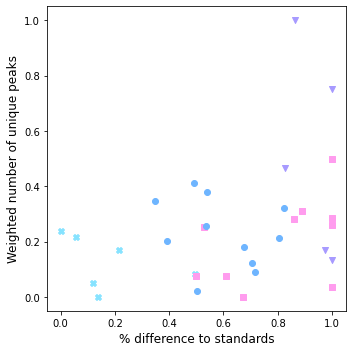

In [6]:
from matplotlib.lines import Line2D

df = ise_td.result.sort_index()

c1, c2, c3, c4 = '#85e3ff', '#a79aff', '#ff9cee', '#6eb5ff'

colors = [
    c1, c1, c1, c1, c1, c1, # std + std
    c2, c2, c2, c2, c2, # samples (pure)
    c3, c3, c3, c3, c3, c3, c3, c3, c3, c3, # sample + sample
    c4, c4, c4, c4, c4, # std + sample
    c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4,
]

m1, m2, m3, m4 = 'o','o','o','o'
markers = [
    m1, m1, m1, m1, m1, m1, # std + std
    m2, m2, m2, m2, m2, # samples (pure)
    m3, m3, m3, m3, m3, m3, m3, m3, m3, m3, # sample + sample
    m4, m4, m4, m4, m4, # std + sample
    m4, m4, m4, m4, m4,
    m4, m4, m4, m4, m4,
    m4, m4, m4, m4, m4,
]

fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.set_xlabel('% difference to standards', fontsize=12)
ax.set_ylabel('Weighted number of unique peaks', fontsize=12)

legend_elements = [
    Line2D([0],[0], marker='v', color='w', markerfacecolor=c2, markersize=12, label='Sample'),
    Line2D([0],[0], marker='s', color='w', markerfacecolor=c3, markersize=12, label='Sample + Sample'),
    Line2D([0],[0], marker='o', color='w', markerfacecolor=c4, markersize=12, label='Sample + Std'),
    Line2D([0],[0], marker='X', color='w', markerfacecolor=c1, markersize=12, label='Std + Std'),
]

ax.scatter(df['% Diff Scaled'][:6], df['Uniqueness Scaled'][:6], marker='X', c=c1)
ax.scatter(df['% Diff Scaled'][6:11], df['Uniqueness Scaled'][6:11], marker='v', c=c2)
ax.scatter(df['% Diff Scaled'][11:21], df['Uniqueness Scaled'][11:21], marker='s', c=c3)
ax.scatter(df['% Diff Scaled'][21:], df['Uniqueness Scaled'][21:], marker='o', c=c4)

#ax.set_title('AMF Test Dataset', fontsize=14, fontweight='bold')

#ax.legend(handles=legend_elements, loc='upper left')

fig.tight_layout()
fig.savefig('output_reproducibility\\amf-test-dataset.png')

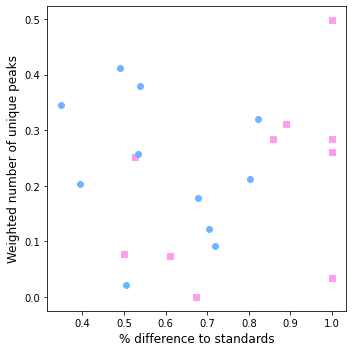

In [7]:
from matplotlib.lines import Line2D

df = ise_td.result.sort_index()

c1, c2, c3, c4 = '#85e3ff', '#a79aff', '#ff9cee', '#6eb5ff'

colors = [
    c1, c1, c1, c1, c1, c1, # std + std
    c2, c2, c2, c2, c2, # samples (pure)
    c3, c3, c3, c3, c3, c3, c3, c3, c3, c3, # sample + sample
    c4, c4, c4, c4, c4, # std + sample
    c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4,
]

m1, m2, m3, m4 = 'o','o','o','o'
markers = [
    m1, m1, m1, m1, m1, m1, # std + std
    m2, m2, m2, m2, m2, # samples (pure)
    m3, m3, m3, m3, m3, m3, m3, m3, m3, m3, # sample + sample
    m4, m4, m4, m4, m4, # std + sample
    m4, m4, m4, m4, m4,
    m4, m4, m4, m4, m4,
    m4, m4, m4, m4, m4,
]

fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.set_xlabel('% difference to standards', fontsize=12)
ax.set_ylabel('Weighted number of unique peaks', fontsize=12)

legend_elements = [
    Line2D([0],[0], marker='v', color='w', markerfacecolor=c2, markersize=12, label='Sample'),
    Line2D([0],[0], marker='s', color='w', markerfacecolor=c3, markersize=12, label='Sample + Sample'),
    Line2D([0],[0], marker='o', color='w', markerfacecolor=c4, markersize=12, label='Sample + Std'),
    Line2D([0],[0], marker='X', color='w', markerfacecolor=c1, markersize=12, label='Std + Std'),
]

#ax.scatter(df['% Diff Scaled'][:6], df['Uniqueness Scaled'][:6], marker='X', c=c1)
#ax.scatter(df['% Diff Scaled'][6:11], df['Uniqueness Scaled'][6:11], marker='v', c=c2)
ax.scatter(df['% Diff Scaled'][11:21], df['Uniqueness Scaled'][11:21], marker='s', c=c3)
ax.scatter(df['% Diff Scaled'][21:], df['Uniqueness Scaled'][21:], marker='o', c=c4)

#ax.set_title('AMF Test Dataset', fontsize=14, fontweight='bold')

#ax.legend(handles=legend_elements, loc='upper left')

fig.tight_layout()
fig.savefig('output_reproducibility\\amf-test-dataset-mixed.png')